In [1]:
%maven ai.djl:api:0.32.0
%maven ai.djl:basicdataset:0.32.0
%maven org.slf4j:slf4j-simple:2.0.17 
%maven org.knowm.xchart:xchart:3.8.3

%maven ai.djl.fasttext:fasttext-engine:0.32.0
%maven org.apache.commons:commons-math3:3.6.1

In [2]:
import ai.djl.ndarray.*;
import ai.djl.ndarray.types.*;

import ai.djl.Application;
import ai.djl.Model;
import ai.djl.ModelException;
import ai.djl.modality.nlp.DefaultVocabulary;
import ai.djl.ndarray.NDArray;
import ai.djl.ndarray.NDList;
import ai.djl.ndarray.NDManager;
import ai.djl.ndarray.types.Shape;
import ai.djl.repository.zoo.Criteria;
import ai.djl.repository.zoo.ModelZoo;
import ai.djl.repository.zoo.ZooModel;
import ai.djl.modality.nlp.embedding.ModelZooTextEmbedding;
import ai.djl.training.util.ProgressBar;
import ai.djl.modality.Classifications;

import java.io.IOException;
import java.util.Arrays;
import java.util.List;

import org.knowm.xchart.*;

import java.io.*;
import java.util.*;
import java.util.stream.*;

import static org.jjavaglue.core.J.*;

In [11]:
import ai.djl.fasttext.zoo.nlp.textclassification.FtTextClassification;
import ai.djl.fasttext.zoo.nlp.word_embedding.FtWord2VecWordEmbedding;

NDArray fatherEmbedding;
NDArray motherEmbedding;
NDArray manEmbedding;
NDArray womanEmbedding;

Criteria<String, Classifications> criteria = Criteria.builder()
                        .setTypes(String.class, Classifications.class)
                        .build();

List<String> words = Arrays.asList("father", "mother", "man", "woman");

try (ZooModel<String, Classifications> model = criteria.loadModel(); NDManager manager = model.getNDManager()) {

    FtWord2VecWordEmbedding fasttextWord2VecWordEmbedding = new FtWord2VecWordEmbedding(model, new DefaultVocabulary(words));
    
    // Print the vocabulary indices to verify they're valid
    for (String word : words) {
        long index = fasttextWord2VecWordEmbedding.preprocessWordToEmbed(word);
        System.out.println(word + " index: " + index);
    }
    
    // Get embeddings directly
    fatherEmbedding = fasttextWord2VecWordEmbedding.embedWord(manager, fasttextWord2VecWordEmbedding.preprocessWordToEmbed("father"));
    motherEmbedding = fasttextWord2VecWordEmbedding.embedWord(manager, fasttextWord2VecWordEmbedding.preprocessWordToEmbed("mother"));
    manEmbedding = fasttextWord2VecWordEmbedding.embedWord(manager, fasttextWord2VecWordEmbedding.preprocessWordToEmbed("man"));
    womanEmbedding = fasttextWord2VecWordEmbedding.embedWord(manager, fasttextWord2VecWordEmbedding.preprocessWordToEmbed("woman"));
    
    // Print all embeddings
    System.out.println("Father embedding: " + Arrays.toString(fatherEmbedding.toFloatArray()));
}

father index: 0
mother index: 1
man index: 2
woman index: 3
Father embedding: [0.008478055, 0.008586667, 0.0043793926, -0.005206132, 0.0066232313, 0.006929119, -0.0035571456, -0.0024016246, -0.0053971275, 0.011147789, -0.0047438927, -0.0056628976, -0.0072263274, -0.008486935, -0.001165267, 8.0579607E-4, 0.0021652856, -0.0048671714, -0.0014226872, 0.002326041, 0.0076303673, -0.0020549938, 0.0072481697, -0.004771288, -0.0020757166, -0.010974138, -5.278619E-4, 0.0060657286, 0.008277063, -0.0040070484, 5.6856225E-4, -0.008103159, 2.1144474E-4, -0.002810502, -0.0043829996, 0.005902646, -0.0015682017, 0.005113765, -6.772056E-4, -0.0049630716, -0.006519038, -0.0017896155, 0.006803878, 0.006063746, -1.3020054E-4, -9.5656596E-4, -0.006941749, 0.009593944, -0.0052995714, 3.908405E-4, 0.0046470296, -0.008678706, 0.0054636826, 0.002051021, -0.0036540283, -0.0049794386, -0.0036232462, -0.00553633, -0.0059089623, 0.007206622, -0.0048559876, -0.008759691, -0.0015117401, -0.005556864, 0.004139412, -0.

In [12]:
int cellWidth = 20;

Embedding range: [-0.010974138, 0.011147789]


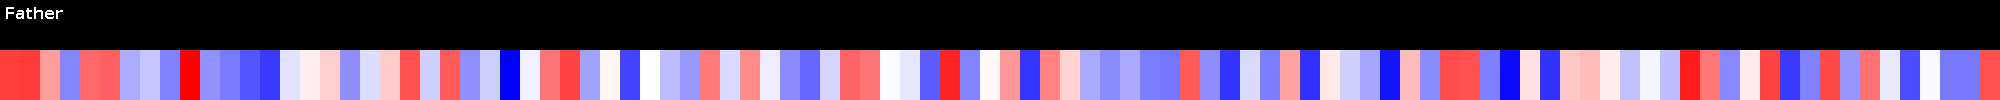

In [13]:
import static org.jjavaglue.core.V.*;

visualizeEmbedding("Father", fatherEmbedding.toFloatArray(), cellWidth, 50, false);

Embedding range: [-0.013783162, 0.013402071]


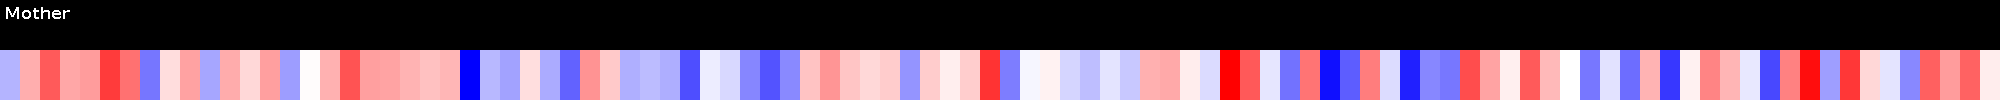

In [14]:
visualizeEmbedding("Mother", motherEmbedding.toFloatArray(), cellWidth, 50, false);

Embedding range: [-0.010088795, 0.010073607]


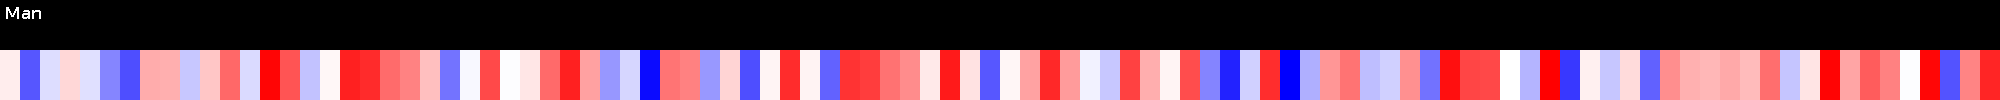

In [15]:
visualizeEmbedding("Man", manEmbedding.toFloatArray(), cellWidth, 50, false);

Embedding range: [-0.009970628, 0.009584083]


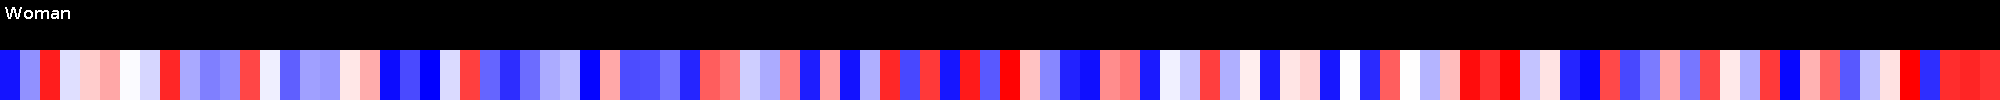

In [16]:
visualizeEmbedding("Woman", womanEmbedding.toFloatArray(), cellWidth, 50, false);

Embedding range: [-0.02275831, 0.016015274]


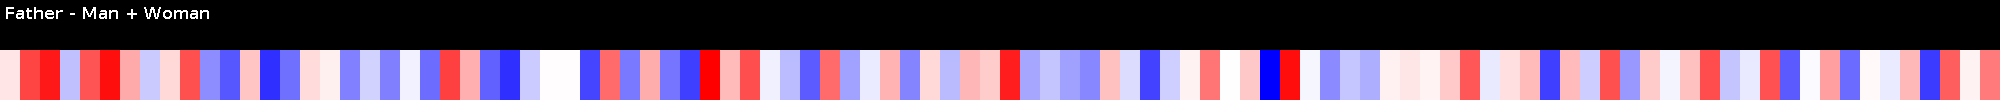

In [17]:
import org.apache.commons.math3.linear.ArrayRealVector;
import org.apache.commons.math3.linear.RealVector;
import static org.jjavaglue.core.Convert.*;

// Convert float arrays to RealVectors
RealVector fatherVector = new ArrayRealVector(floatArrayToDoubleArray(fatherEmbedding.toFloatArray()));
RealVector manVector = new ArrayRealVector(floatArrayToDoubleArray(manEmbedding.toFloatArray()));
RealVector womanVector = new ArrayRealVector(floatArrayToDoubleArray(womanEmbedding.toFloatArray()));

// Perform vector arithmetic: king - man + woman = motherish
RealVector motherishVector = fatherVector.subtract(manVector).add(womanVector);

// Convert back to float array for visualization
float[] motherishArray = doubleArrayToFloatArray(motherishVector.toArray());

// Create a BufferedImage for visualization
visualizeEmbedding("Father - Man + Woman", motherishArray, cellWidth, 50, false);

In [18]:
System.out.println("motherish: " + Arrays.toString(motherishArray));

motherish: [-0.0013997369, 0.010836764, 0.014220031, -0.008192121, 0.009609056, 0.0149134705, 0.0031086262, -0.0074123647, -4.154779E-4, 0.009906776, -0.012060238, -0.016148001, 0.0011379472, -0.019162653, -0.014253848, -6.083344E-4, -0.0022667916, -0.012944749, -0.0068056593, -0.013017463, -0.0044269864, -0.014547233, 0.011174914, 0.002677774, -0.015369786, -0.019155258, -0.00734187, -0.0032246846, -0.003257188, -0.017490057, 0.007861108, -0.01353642, 0.0029418455, -0.01386552, -0.017946111, 0.016015274, 0.0018432135, 0.010063965, -0.004512783, -0.008526154, -0.01587603, 0.007925969, -0.010521993, -0.0048578177, 0.0023898177, -0.012687101, -4.0313322E-4, -0.008590286, 0.0021475733, 4.8449056E-4, 0.013775776, -0.010174935, -0.0078225825, -0.010559274, -0.012510182, 0.0014047557, -0.0060492996, -0.017687686, -0.007090143, -0.0023940457, 0.0071931593, -0.0032696761, 8.09853E-4, -0.02275831, 0.015050621, -0.004070148, -0.012188373, -0.0077433055, -0.009546079, -0.0023185043, -0.0014672761